# **Fuzzy Logic Controller**

## Example 1

In [ ]:
# install skfuzzy
!pip install scikit-fuzzy

In [ ]:
# load module
%matplotlib inline

import numpy as np 
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt 

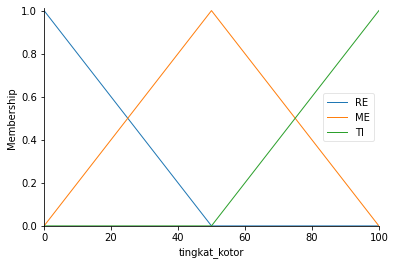

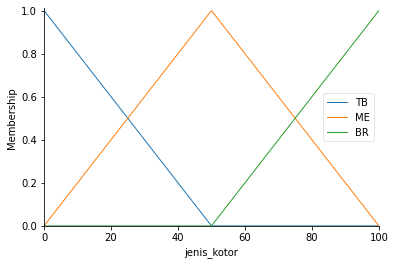

In [ ]:
# antecednets / inputs
tingkat_kotor = ctrl.Antecedent(np.arange(0, 101, 1), 'tingkat_kotor')
jenis_kotor = ctrl.Antecedent(np.arange(0, 101, 1), 'jenis_kotor')

tingkat_kotor_nama = ['RE', 'ME', 'TI'] # rendah, menengah, tinggi
jenis_kotor_nama = ['TB', 'ME', 'BR'] # tidak berminyak, menengah, berminyak

tingkat_kotor.automf(names=tingkat_kotor_nama)
jenis_kotor.automf(names=jenis_kotor_nama)

tingkat_kotor.view()
jenis_kotor.view()

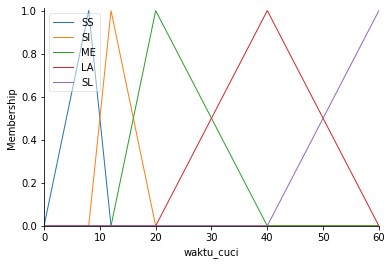

In [ ]:
# consequents / outputs
waktu_cuci = ctrl.Consequent(np.arange(0, 61, 1), 'waktu_cuci')

waktu_cuci['SS'] = fuzz.trimf(waktu_cuci.universe, [0, 8, 12]) # Sangat Singkat
waktu_cuci['SI'] = fuzz.trimf(waktu_cuci.universe, [8, 12, 20]) # Singkat
waktu_cuci['ME'] = fuzz.trimf(waktu_cuci.universe, [12, 20, 40]) # Menengah
waktu_cuci['LA'] = fuzz.trimf(waktu_cuci.universe, [20, 40, 60]) # Lama
waktu_cuci['SL'] = fuzz.trimf(waktu_cuci.universe, [40, 60, 60]) # Sangat Lama

waktu_cuci.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f6e6eee0610>)

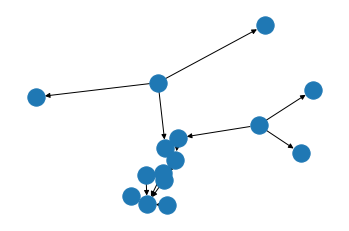

In [ ]:
# rule based
aturan1 = ctrl.Rule(tingkat_kotor['TI'] | jenis_kotor['BR'], waktu_cuci['SL'])
aturan2 = ctrl.Rule(tingkat_kotor['ME'] | jenis_kotor['BR'], waktu_cuci['LA'])
aturan3 = ctrl.Rule(tingkat_kotor['RE'] | jenis_kotor['BR'], waktu_cuci['LA'])
aturan4 = ctrl.Rule(tingkat_kotor['TI'] | jenis_kotor['ME'], waktu_cuci['LA'])
aturan5 = ctrl.Rule(tingkat_kotor['ME'] | jenis_kotor['ME'], waktu_cuci['ME'])
aturan6 = ctrl.Rule(tingkat_kotor['RE'] | jenis_kotor['ME'], waktu_cuci['ME'])
aturan7 = ctrl.Rule(tingkat_kotor['TI'] | jenis_kotor['TB'], waktu_cuci['ME'])
aturan8 = ctrl.Rule(tingkat_kotor['ME'] | jenis_kotor['TB'], waktu_cuci['SI'])
aturan9 = ctrl.Rule(tingkat_kotor['RE'] | jenis_kotor['TB'], waktu_cuci['SS'])

aturan1.view()

In [ ]:
# control simulation
kendali_mesincuci = ctrl.ControlSystem([aturan1, aturan2, aturan3, aturan4, aturan5, aturan6, aturan7, aturan8, aturan9])
mesincuci = ctrl.ControlSystemSimulation(kendali_mesincuci)

In [1]:
# fungsi compute dan simulasi
def simulasi(tingkat_kotor_var=50, jenis_kotor_var=50):
    mesincuci.input['tingkat_kotor'] = tingkat_kotor_var
    mesincuci.input['jenis_kotor'] = jenis_kotor_var

    mesincuci.compute()
    print('Lama Mencuci: ', mesincuci.output['waktu_cuci'], 'menit')
    waktu_cuci.view(sim=mesincuci)

In [ ]:
# interactive slider
from ipywidgets import interact, fixed
interact(simulasi, tingkat_kotor_var = (0,100,0.1), jenis_kotor_var = (0,100,0.1));

interactive(children=(FloatSlider(value=50.0, description='tingkat_kotor_var'), FloatSlider(value=50.0, descri…

## Example 2

source: https://github.com/1184065/FuzzyLogicMamdani with some modification

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
%matplotlib inline

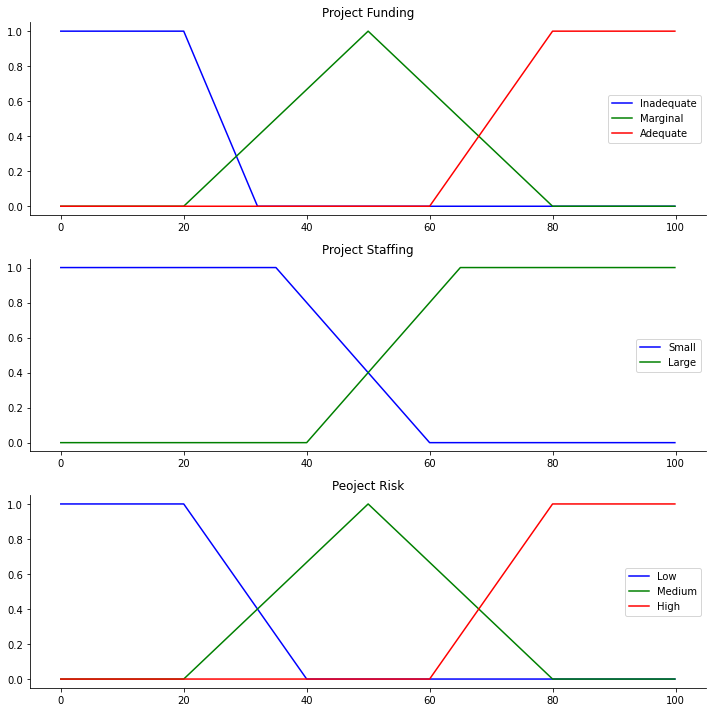

In [ ]:
# universe variables
x_qual = np.arange(0, 100, 0.1)
x_serv = np.arange(0, 100, 0.1)
x_tip  = np.arange(0, 100, 0.1)

# fuzzy membership functions
qual_lo = fuzz.trapmf(x_qual, [0, 0, 20, 32])
qual_md = fuzz.trimf(x_qual, [20, 50, 80])
qual_hi = fuzz.trapmf(x_qual, [60, 80, 100, 100])

serv_lo = fuzz.trapmf(x_serv, [0, 0, 35, 60])
serv_md = fuzz.trapmf(x_serv, [40 ,65, 100, 100])

tip_lo = fuzz.trapmf(x_tip, [0, 0, 20, 40])
tip_md = fuzz.trimf(x_tip, [20, 50, 80])
tip_hi = fuzz.trapmf(x_tip, [60, 80, 100, 100])

# Visualize these universes and membership functions
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(10, 10))

ax0.plot(x_qual, qual_lo, 'b', linewidth=1.5, label='Inadequate')
ax0.plot(x_qual, qual_md, 'g', linewidth=1.5, label='Marginal')
ax0.plot(x_qual, qual_hi, 'r', linewidth=1.5, label='Adequate')
ax0.set_title('Project Funding')
ax0.legend()

ax1.plot(x_serv, serv_lo, 'b', linewidth=1.5, label='Small')
ax1.plot(x_serv, serv_md, 'g', linewidth=1.5, label='Large')
ax1.set_title('Project Staffing')
ax1.legend()

ax2.plot(x_tip, tip_lo, 'b', linewidth=1.5, label='Low')
ax2.plot(x_tip, tip_md, 'g', linewidth=1.5, label='Medium')
ax2.plot(x_tip, tip_hi, 'r', linewidth=1.5, label='High')
ax2.set_title('Peoject Risk')
ax2.legend()


for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

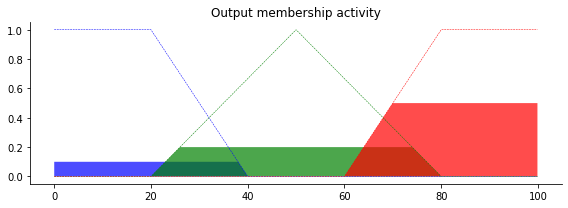

In [ ]:
# Input Test Value
projectFunding = 26
projectStaffing = 57.5

qual_level_lo = fuzz.interp_membership(x_qual, qual_lo, projectFunding)
qual_level_md = fuzz.interp_membership(x_qual, qual_md, projectFunding)
qual_level_hi = fuzz.interp_membership(x_qual, qual_hi, projectFunding)

serv_level_lo = fuzz.interp_membership(x_serv, serv_lo, projectStaffing )
serv_level_md = fuzz.interp_membership(x_serv, serv_md, projectStaffing )

# Rules 
active_rule1 = np.fmax(qual_level_hi, serv_level_lo)
tip_activation_lo = np.fmin(active_rule1, tip_lo)  
active_rule2 = np.fmin(qual_level_md, serv_level_md) 
tip_activation_md = np.fmin(active_rule2, tip_md)
tip_activation_hi = np.fmin(qual_level_lo, tip_hi) 
tip0 = np.zeros_like(x_tip)

# Plot
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.fill_between(x_tip, tip0, tip_activation_lo, facecolor='b', alpha=0.7)
ax0.plot(x_tip, tip_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.fill_between(x_tip, tip0, tip_activation_md, facecolor='g', alpha=0.7)
ax0.plot(x_tip, tip_md, 'g', linewidth=0.5, linestyle='--')
ax0.fill_between(x_tip, tip0, tip_activation_hi, facecolor='r', alpha=0.7)
ax0.plot(x_tip, tip_hi, 'r', linewidth=0.5, linestyle='--')
ax0.set_title('Output membership activity')


for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

tip:  84.95


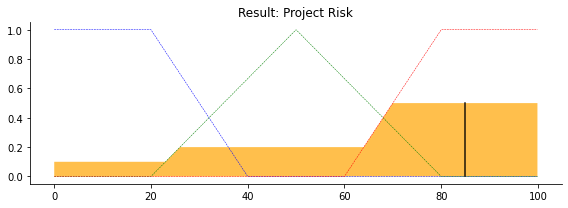

In [ ]:
# Defazzification
aggregated = np.fmax(tip_activation_lo,np.fmax(tip_activation_md, tip_activation_hi))

# Calculate defuzzified result
tip = fuzz.defuzz(x_tip, aggregated, 'mom')
tip_activation = fuzz.interp_membership(x_tip, aggregated, tip)  # for plot

# Tampilkan
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.plot(x_tip, tip_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(x_tip, tip_md, 'g', linewidth=0.5, linestyle='--')
ax0.plot(x_tip, tip_hi, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(x_tip, tip0, aggregated, facecolor='Orange', alpha=0.7)
ax0.plot([tip, tip], [0, tip_activation], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Result: Project Risk')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()
print('tip: ', tip)

# **Neural Network**

source: https://github.com/shubhamchouksey/SimpleNeuralNetwork

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Neural Network for solving x1-x2 Problem
# 1 1 --> 0
# 1 0 --> 1
# 0 1 --> 1
# 0 0 --> 0

In [ ]:
# Activation function: sigmoid
def sigmoid(x): 
    return np.exp(x)/(1 + np.exp(x))

In [ ]:
# Sigmoid deriative
def sigmoid_deriv(x):
    return sigmoid(x)*(1-sigmoid(x))

In [ ]:
# Forward function
def forward(x, w1, w2, predict=False):
    a1 = np.matmul(x, w1)
    z1 = sigmoid(a1)
  
    # create and add the bias
    bias = np.ones((len(z1), 1))
    z1 = np.concatenate((bias, z1), axis = 1)
    a2 = np.matmul(z1, w2)
    z2 = sigmoid(a2)
    if predict:
        return z2
    return a1, z1, a2, z2

In [ ]:
# Backprop fuction
def backprop(a2, z0, z1, z2, y): 
    delta2 = z2 - y
    Delta2 = np.matmul(z1.T, delta2)
    delta1 = (delta2.dot(w2[1:,:].T))*sigmoid_deriv(a1)
    Delta1 = np.matmul(z0.T, delta1)
    return delta2, Delta1, Delta2

In [ ]:
# First column is the bias
X = np.array([[1, 1, 0],
              [1, 0, 1],
              [1, 0, 0],
              [1, 1, 1]])
y = np.array([[1], [1], [0], [0]])

In [ ]:
# init weights 
w1 = np.random.randn(3,5)
w2 = np.random.randn(6,1)

# init learning rate
lr = 0.09
costs = []

# init epochs
epochs = 17000

m = len(X)

Iteration:  0 Error:  0.48971946352451207
Iteration:  1000 Error:  0.384139412776173
Iteration:  2000 Error:  0.14509757810044902
Iteration:  3000 Error:  0.06210998002926496
Iteration:  4000 Error:  0.0366126883900014
Iteration:  5000 Error:  0.02535206322382142
Iteration:  6000 Error:  0.019188501155014484
Iteration:  7000 Error:  0.015348844646111122
Iteration:  8000 Error:  0.012744619671798806
Iteration:  9000 Error:  0.010869555303972139
Iteration:  10000 Error:  0.009458553293478836
Iteration:  11000 Error:  0.008360173120000163
Iteration:  12000 Error:  0.007481946057641143
Iteration:  13000 Error:  0.006764365428567967
Iteration:  14000 Error:  0.006167473872126605
Iteration:  15000 Error:  0.00566348255006034
Iteration:  16000 Error:  0.005232487223330508
Training completed.
Percentages: 
[[0.99584963]
 [0.99425223]
 [0.0023023 ]
 [0.00723903]]
Predictions: 
[[1.]
 [1.]
 [0.]
 [0.]]


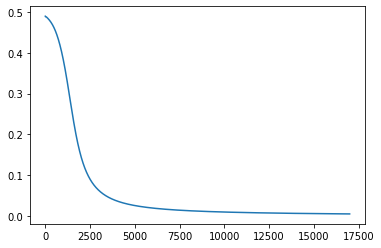

In [ ]:
# Start training
for i in range(epochs):
    # Forward
    a1, z1, a2, z2 = forward(X, w1, w2)
    
    # Backprop 
    delta2, Delta1, Delta2 = backprop(a2, X, z1, z2, y)
    #print(delta2,Delta1,Delta2)

    w1 -= lr*(1/m)*Delta1
    w2 -= lr*(1/m)*Delta2

    # Add costs to list for plotting
    c = np.mean(np.abs(delta2))
    costs.append(c)
    
    if i % 1000 == 0:
        print("Iteration: ",i, "Error: ",c)
    
# Training complete
print('Training completed.')

z3 = forward(X,w1,w2,True)
print('Percentages: ')
print(z3)
print('Predictions: ')
print(np.round(z3))

# Plot cost 
plt.plot(costs)
plt.show()

# **Genetic Algorithm**

## Example 1

source : https://www.kaggle.com/ashishpatel26/genetic-algorithm-from-scratch

In [5]:
geneSet="abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!. "
target="Ardy Seto Priambodo"

In [6]:
import random
import datetime

def gen_parent(length):
    genes=[]
    while len(genes)<length:
            sampleSize=min(length-len(genes),len(geneSet))
            genes.extend(random.sample(geneSet,sampleSize))
    return ''.join(genes)

In [7]:
def get_fitness(guess):
      return sum(1 for expected,actual in zip(target,guess) if expected==actual)

In [8]:
def mutate(parent):
    index=random.randrange(0,len(parent))
    childGenes=list(parent)
    newGene,alternate=random.sample(geneSet,2)
    childGenes[index]=alternate if newGene==childGenes[index] else newGene
    return ''.join(childGenes)

In [9]:
def display(guess):
    timeDiff=datetime.datetime.now()-startTime
    fitness=get_fitness(guess)
    print("{}\t{}\t{}".format(guess,fitness,timeDiff))

In [10]:
random.seed()
startTime=datetime.datetime.now()
bestParent=gen_parent(len(target))
bestFitness=get_fitness(bestParent)
display(bestParent)

vyDABtYbUFirf .Cgpj	1	0:00:00


In [11]:
child=mutate(bestParent)
display(child)

viDABtYbUFirf .Cgpj	1	0:00:38.783893


In [12]:
while True:
    child=mutate(bestParent)
    childFitness=get_fitness(child)
    if bestFitness>=childFitness:
           continue
    display(child)
    if childFitness>=len(bestParent):
           break
    bestFitness=childFitness
    bestParent=child

vyDABSYbUFirf .Cgpj	2	0:00:43.719609
vyDABSYbUFirf .Copj	3	0:00:43.720596
vyDABSYbUFirfa.Copj	4	0:00:43.721596
vydABSYbUFirfa.Copj	5	0:00:43.722605
vydABSYbUFirfa.Copo	6	0:00:43.723596
vydA SYbUFirfa.Copo	7	0:00:43.725599
vydA SYtUFirfa.Copo	8	0:00:43.725599
vrdA SYtUFirfa.Copo	9	0:00:43.726608
vrdA SYtUFirfa.bopo	10	0:00:43.726608
vrdA SYtUFPrfa.bopo	11	0:00:43.726608
vrdA SetUFPrfa.bopo	12	0:00:43.733610
vrdA SetUFPrfambopo	13	0:00:43.734598
vrdA SetoFPrfambopo	14	0:00:43.737602
ArdA SetoFPrfambopo	15	0:00:43.740594
ArdA SetoFPrfambodo	16	0:00:43.744595
ArdA SetoFPriambodo	17	0:00:43.750606
ArdA Seto Priambodo	18	0:00:43.762610
Ardy Seto Priambodo	19	0:00:43.767604


## Example 2

source: https://pygad.readthedocs.io/en/latest/README_pygad_ReadTheDocs.html#examples

In [ ]:
!pip install pygad

     |████████████████████████████████| 51kB 2.1MB/s 


/usr/local/lib/python3.7/dist-packages/pygad/pygad.py:396: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resutled in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  if not self.suppress_warnings: warnings.warn("The percentage of genes to mutate (mutation_percent_genes={mutation_percent}) resutled in selecting ({mutation_num}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.".format(mutation_percent=mutation_percent_genes, mutation_num=mutation_num_genes))


Generation = 1
Fitness    = 0.04550279344966684
Change     = 0.04550279344966684
Generation = 2
Fitness    = 0.051342038668653
Change     = 0.005839245218986162
Generation = 3
Fitness    = 0.05403725864081332
Change     = 0.0026952199721603162
Generation = 4
Fitness    = 0.054075985385079156
Change     = 3.8726744265839275e-05
Generation = 5
Fitness    = 0.0689788255643263
Change     = 0.014902840179247145
Generation = 6
Fitness    = 0.144791649767694
Change     = 0.07581282420336768
Generation = 7
Fitness    = 0.16164648781032845
Change     = 0.016854838042634462
Generation = 8
Fitness    = 0.8323282804535025
Change     = 0.6706817926431741
Generation = 9
Fitness    = 2.561730263212345
Change     = 1.7294019827588425
Generation = 10
Fitness    = 34.124850518257844
Change     = 31.563120255045497
Generation = 11
Fitness    = 34.124850518257844
Change     = 0.0
Generation = 12
Fitness    = 34.124850518257844
Change     = 0.0
Generation = 13
Fitness    = 34.124850518257844
Change     = 0

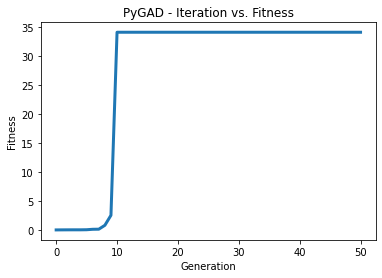

Parameters of the best solution : [ 3.38002251  4.09137619  0.82409775  4.6778361  -1.03701413 -0.21516777]
Fitness value of the best solution = 34.124850518257844
Index of the best solution : 0
Predicted output based on the best solution : 44.02930415766847
Best fitness value reached after 10 generations.


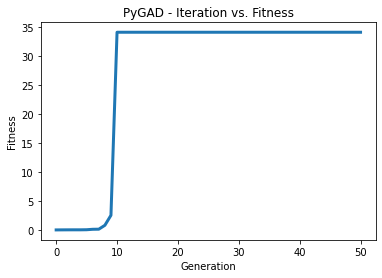

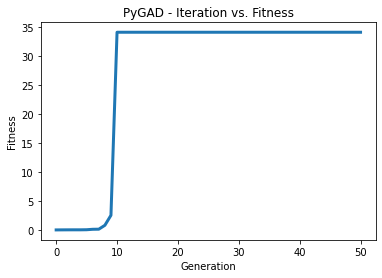

In [ ]:
import pygad
import numpy

"""
Given the following function:
    y = f(w1:w6) = w1x1 + w2x2 + w3x3 + w4x4 + w5x5 + w6x6
    where (x1,x2,x3,x4,x5,x6)=(4,-2,3.5,5,-11,-4.7) and y=44
What are the best values for the 6 weights (w1 to w6)? We are going to use the genetic algorithm to optimize this function.
"""

function_inputs = [4,-2,3.5,5,-11,-4.7] # Function inputs.
desired_output = 44 # Function output.

def fitness_func(solution, solution_idx):
    # Calculating the fitness value of each solution in the current population.
    # The fitness function calulates the sum of products between each input and its corresponding weight.
    output = numpy.sum(solution*function_inputs)
    fitness = 1.0 / numpy.abs(output - desired_output)
    return fitness

fitness_function = fitness_func

num_generations = 50 # Number of generations.
num_parents_mating = 4 # Number of solutions to be selected as parents in the mating pool.

# To prepare the initial population, there are 2 ways:
# 1) Prepare it yourself and pass it to the initial_population parameter. This way is useful when the user wants to start the genetic algorithm with a custom initial population.
# 2) Assign valid integer values to the sol_per_pop and num_genes parameters. If the initial_population parameter exists, then the sol_per_pop and num_genes parameters are useless.
sol_per_pop = 8 # Number of solutions in the population.
num_genes = len(function_inputs)

init_range_low = -2
init_range_high = 5

parent_selection_type = "sss" # Type of parent selection.
keep_parents = 1 # Number of parents to keep in the next population. -1 means keep all parents and 0 means keep nothing.

crossover_type = "single_point" # Type of the crossover operator.

# Parameters of the mutation operation.
mutation_type = "random" # Type of the mutation operator.
mutation_percent_genes = 10 # Percentage of genes to mutate. This parameter has no action if the parameter mutation_num_genes exists.

last_fitness = 0
def callback_generation(ga_instance):
    global last_fitness
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution()[1]))
    print("Change     = {change}".format(change=ga_instance.best_solution()[1] - last_fitness))
    last_fitness = ga_instance.best_solution()[1]

# Creating an instance of the GA class inside the ga module. Some parameters are initialized within the constructor.
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                       on_generation=callback_generation)

# Running the GA to optimize the parameters of the function.
ga_instance.run()

# After the generations complete, some plots are showed that summarize the how the outputs/fitenss values evolve over generations.
ga_instance.plot_result()

# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

prediction = numpy.sum(numpy.array(function_inputs)*solution)
print("Predicted output based on the best solution : {prediction}".format(prediction=prediction))

if ga_instance.best_solution_generation != -1:
    print("Best fitness value reached after {best_solution_generation} generations.".format(best_solution_generation=ga_instance.best_solution_generation))

# Saving the GA instance.
filename = 'genetic' # The filename to which the instance is saved. The name is without extension.
ga_instance.save(filename=filename)

# Loading the saved GA instance.
loaded_ga_instance = pygad.load(filename=filename)
loaded_ga_instance.plot_result()